# Trabalho paradigma Orientado a Objeto

Proponha uma hierarquia de classes qualquer (exclusiva, em relação aos colegas). Como sugestão, temos as seguintes:

**2. Funcionário (Base); Professor, Secretário, Coordenador (Derivadas).**

---

Para cada classe da hierarquia escolhida, proponha propriedades, métodos exclusivos e métodos sobrescritos.       
Implemente as classes e uma situação de mensagem polimórfica em Python.

## Diagrama de classes

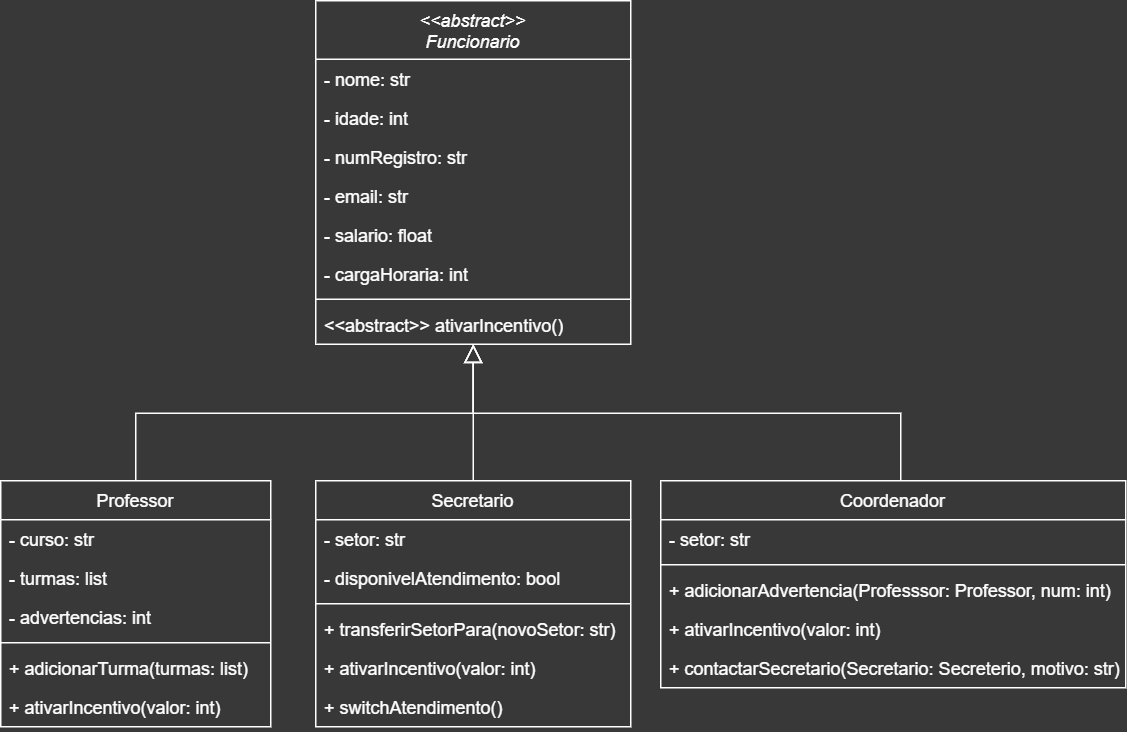

In [0]:
from google.colab import drive
from IPython.display import Image

Image('drive/My Drive/ParadigmaOO.png')

Módulos usados:

In [0]:
import datetime
from abc import ABC, abstractmethod

## Testes (Temporário)

In [0]:
#fn = Professor("João", 25, "joão@gmail.com")
#fn.getNumRegistro

#fn = Professor("Joãos", 25, "joão@gmail.com")
#type(fn.getNumRegistro())

prof = Professor("João", 25, "joao@gmail.com", 25 , "Ciências Biologicas")
prof.ativarIncentivo(10)
prof.adicionarTurma(["T587-99","H197-16","T198-22"])

secr = Secretario("José", 55, "jose@gmail.com", 40, "Coordenação das Engenharias")
secr.transferirSetorPara("DAE")
secr.ativarIncentivo(2)

coord = Coordenador("Lucas", 30, "Lucas@yahoo.com.br", 40, "Assuntos internacionais")
coord.adicionarAdvertencia(prof,2)

prof.toString()
secr.toString()
coord.toString()

secr.switchAtendimento()
coord.contactarSecretario(secr,"Motivo X")
secr.toString()

Transferência do secretário José do setor Coordenação das Engenharias para DAE realizada com sucesso

Nome: João
Idade: 25
Cargo: Professor
Número de registro: 20200111001
Email: joao@gmail.com
Carga horária: 25 horas semanais
Salário: R$2750.0
Curso: Ciências Biologicas
Turmas cadastradas: 'T587-99', 'H197-16', 'T198-22'
Advertências: 2

Nome: José
Idade: 55
Cargo: Secretario
Número de registro: 20200122002
Email: jose@gmail.com
Carga horária: 40 horas semanais
Salário: R$1440.0
Setor: DAE
Disponível para atendimento: Não

Nome: Lucas
Idade: 30
Cargo: Coordenador
Número de registro: 20200133003
Email: Lucas@yahoo.com.br
Carga horária: 40 horas semanais
Salário: R$4500
Setor: Assuntos internacionais

Suporte solicitado com sucesso ao Secretário José
Motivo do contato: Motivo X 

Nome: José
Idade: 55
Cargo: Secretario
Número de registro: 20200122002
Email: jose@gmail.com
Carga horária: 40 horas semanais
Salário: R$1440.0
Setor: DAE
Disponível para atendimento: Sim



## Classe funcionário

In [0]:
class Funcionario(ABC):
  '''Funcionário de terminada instituição de ensino'''
  def __init__(self, nome, idade, email, cargaHoraria, salario=0):
    if not nome.isalpha(): # Verifica se o nome não usa somente letras
      raise ValueError(f"O nome '{nome}' é inválido !") # função do f é similar ao .format, porém menos verbosa !
    
    if not str(idade).isdecimal(): # Verifica se a idade possui somente digitos
      raise ValueError(f"O valor {idade} para idade é inválido !")

    if email.find("@") == -1 : # Verifica se há a presença do @
      raise ValueError(f"O e-mail {email} é inválido !")

    self._nome = nome
    self._idade = idade
    self._email = email
    self._cargaHoraria = cargaHoraria
    Funcionario._addContador()
    self._numRegistro = (str(datetime.datetime.now().year) +
                          ("01" if datetime.datetime.now().month < 8 else "02") +
                          ("11" if str(type(self))[17:]=="Professor'>" else "22" if str(type(self))[17:]=="Secretario'>" else "33") +
                          f'{contador:03d}')
    self._salario = 0

  global contador
  contador = 0
  def _addContador():
    global contador
    contador += 1
    return contador
    
  @abstractmethod
  def ativarIncentivo(self, valor):
    pass

  def getNome(self):
    return self._nome

  def getIdade(self):
    return self._idade

  def getNumRegistro(self):
    return self._numRegistro

  def getSalario(self):
    return self._salario

  def getEmail(self):
    return self._email

  def getCargaHoraria(self):
    return self._cargaHoraria

  def setNome(self,nome):
    self._nome = nome

  def setIdade(self,idade):
    self._idade = idade

  def setnumRegistro(self,numRegistro):
    self._numRegistro = numRegistro

  def setSalario(self,salario):
    self._salario = salario

  def setEmail(self,email):
    self._email = email

  def setCargaHoraria(self,cargaHoraria):
    self._cargaHoraria = cargaHoraria


  def toString(self):
    print("Nome: " + self.getNome() +
          "\nIdade: " + str(self.getIdade()) +
          "\nCargo: " + ''.join(e for e in str(type(self))[17:] if e.isalnum()) +
          "\nNúmero de registro: " + self.getNumRegistro() +
          "\nEmail: " + self.getEmail() +
          "\nCarga horária: " + str(self.getCargaHoraria()) + " horas semanais" +
          "\nSalário: R$" + str(self.getSalario())
          )


## Classe Professor

In [0]:
class Professor(Funcionario):
  def __init__(self, nome, idade, email, cargaHoraria, curso, turmas=[], advertencias=0):
    super().__init__(nome, idade, email, cargaHoraria)
    self.setSalario(2500)
    self._curso = curso
    self._turmas = []
    self._advertencias = 0

  def ativarIncentivo(self, valor):
    if not str(valor).isdigit(): # Verifica se a idade possui somente digitos
      raise ValueError(f"O valor {valor} para gerar incentivo é inválido ! Por favor digite soemnte números inteiros positivos")
    self.setSalario((self.getSalario()* (valor/100)) + self.getSalario()) 

  def adicionarTurma(self, turmas):
    if type(turmas) == list:
      for turma in turmas:
        if not turma[0:1].isalpha():
          raise ValueError(f"Nenhuma turma localizada com o codigo '{turma}'")
        if not turma[0:1].isupper():
          raise ValueError(f"Código '{turma}' inválido")
        if not turma[4:5] == "-":
          raise ValueError("Travessão não encontrado")
        if not turma[1:4].isdigit():
          raise ValueError(f"Valor numérico inválido para turma '{turma}'")
        if not turma[5:].isdigit():
          raise ValueError(f"Valor numérico inexistente para turma '{turma}'")
        if not int(turma[5:]) <=99:
          raise ValueError(f"Valor numérico inválido para turma '{turma}'")
        self._turmas.append(turma)


  def getCurso(self):
    return self._curso

  def getTurmas(self):
    return self._turmas

  def setCurso(self,curso):
    self._curso = curso

  def getAdvertencias(self):
    return self._advertencias

  def setAdvertencias(self, num):
    self._advertencias += num

  def toString(self):
    super().toString()
    print("Curso: " + self.getCurso() + 
          "\nTurmas cadastradas: " + str(self.getTurmas())[1:-1] +
          "\nAdvertências: " + str(self.getAdvertencias()) +
          "\n" )


## Classe Secretário

In [0]:
class Secretario(Funcionario):
  def __init__(self, nome, idade, email, cargaHoraria, setor, disponivelAtendimento = False):
    super().__init__(nome, idade, email, cargaHoraria)
    self.setSalario(1200)
    self._setor = setor
    self._disponivelAtendimento = False

  def transferirSetorPara(self,novoSetor):
    print("Transferência do secretário " + self.getNome() + " do setor " + self.getSetor() + f" para {novoSetor} realizada com sucesso\n")
    self.setSetor(novoSetor)

  def ativarIncentivo(self, valor):
    (self.setSalario((self.getSalario()* 0.1) + self.getSalario()) if valor == 1 
     else self.setSalario((self.getSalario()* 0.2) + self.getSalario()) if valor == 2
     else self.setSalario((self.getSalario()* 0.3) + self.getSalario()) if valor ==3 
     else print(f"O valor {valor} para gerar incentivo é inválido !\nPor favor digite 1, 2 ou 3 para aumentar respectivamente em 10%, 20% e 30% o salário\n"))

  def switchAtendimento(self):
      self.setDisponivelAtendimento(not self.isDisponivelAtendimento())

  def getSetor(self):
    return self._setor

  def setSetor(self, setor):
    self._setor = setor

  def isDisponivelAtendimento(self):
    return self._disponivelAtendimento

  def setDisponivelAtendimento(self, boolean):
    self._disponivelAtendimento = boolean
  
  def toString(self):
    super().toString()
    print("Setor: " + self.getSetor() + 
          "\nDisponível para atendimento: " + ("Sim" if self.isDisponivelAtendimento() else "Não") +
          "\n" )

## Classe Coordenador

In [0]:
class Coordenador(Funcionario):
  def __init__(self, nome, idade, email, cargaHoraria, setor):
    super().__init__(nome, idade, email, cargaHoraria)
    self.setSalario(4500)
    self._setor = setor

  def adicionarAdvertencia(self, Professor, num):
    Professor.setAdvertencias(num) 

  def contactarSecretario(self, Secretario, motivo):
    if type(motivo) is str:
      if Secretario.isDisponivelAtendimento():
        print("Suporte solicitado com sucesso ao Secretário " + Secretario.getNome() + f"\nMotivo do contato: {motivo} \n")
      else:
        print("Secretário "+ Secretario.getNome() + " ocupado ou ausente\n")
    else:
        print("Por favor, digitar a mensagem em formato apropriado\n")

  def ativarIncentivo(self, valor):
    print("Operação inválida para Coordenador\n")

  def getSetor(self):
    return self._setor

  def toString(self):
    super().toString()
    print("Setor: " + self.getSetor() +
          "\n" )

## Tkinter (Versão Mac)

In [0]:
from tkinter import *
from tkinter import ttk, StringVar, IntVar
import tkinter as tk

contador = 1


class LinhaDeDados():
    def __init__(self, nome, registro, email, cargo):
        self.nome = nome
        self.registro = registro
        self.email = email
        self.cargo = cargo
        global contador
        global trashcanImage
        nameElement = mainContent.create_text(
            40, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 16",
            anchor='w',
            text=nome)
        registerElement = mainContent.create_text(
            232, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 16",
            anchor='w',
            text=registro)
        emailElement = mainContent.create_text(
            440, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 16",
            anchor='w',
            text=email)
        cargoElement = mainContent.create_text(
            680, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 16",
            anchor='w',
            text=cargo)
        moreInfoElement = mainContent.create_text(
            820, 40 + 40*contador,
            fill='#ffbf00',
            font='Helvetica 20 bold',
            anchor='w',
            text='...',
            tags="moreInfoSurface")
        deleteElement = mainContent.create_image(
            850, 35 + 40*contador,
            anchor=NW,
            image=trashcanImage,
            tags="deleteSurface")

        def moreInfoClicked(self):
            print('Mais informações')

        def deleteClicked(event):
            global contador
            x = event.x
            y = event.y
              
            mainContent.delete(mainContent.find_closest(232, y))
            mainContent.delete(mainContent.find_closest(440, y))
            mainContent.delete(mainContent.find_closest(680, y))
            mainContent.delete(mainContent.find_closest(820, y))
            mainContent.delete(mainContent.find_closest(850, y))

            contador -= 1
            if (contador < 10):
                topBar.itemconfig(addBtn, fill="#5cb85c")
        mainContent.tag_bind("moreInfoSurface", "<Button-1>", moreInfoClicked)
        mainContent.tag_bind("deleteSurface", "<Button-1>", deleteClicked)

        contador += 1
        if(contador == 10):
            topBar.itemconfig(addBtn, fill="#C0C0C0")


def addButtonClicked(cont):
    if(contador < 10):
        topBar.itemconfig(addBtn, fill="#5cb85c")
        modal = Tk()
        modal.title("Adicionar funcionário")
        modal.geometry("420x500+%d+%d" % (window.winfo_x(), window.winfo_y()))
        modal.resizable(0, 0)
        topBarAdd = Canvas(
            modal,
            bg="#435d7d",
            height="80",
            width="420",
            highlightthickness=0,
            relief='ridge')
        topBarAdd.create_text(
            210, 40,
            text="Adicionar funcionários",
            fill="#fafdfb",
            font="Helvetica 22 bold")
        topBarAdd.grid(row=0, sticky=W)

        Canvas(modal, height="10").grid(row=1)
        ttk.Label(
            modal,
            font="Helvetica 14",
            foreground="#435d7d",
            text="Classe:").grid(row=2, column=0, sticky=W)
        ComboBox = ttk.Combobox(
            modal,
            font="Helvetica 16",
            state="readonly",
            values=["Professor", "Secretário", "Coordenador"],
            width="15")
        ComboBox.current(0)
        ComboBox.grid(row=2, column=0, sticky=W, padx=70)

        Canvas(modal, height="10").grid(row=3)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Nome:").grid(row=4, column=0, sticky=W)
        name = Entry(
            modal,
            font="Helvetica 16")
        name.grid(row=4, column=0, stick=W, padx=60)

        Canvas(modal, height="10").grid(row=5)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Idade:").grid(row=6, column=0, sticky=W)
        idade = Entry(
            modal,
            font="Helvetica 16",
            width="4")
        idade.grid(row=6, column=0, stick=W, padx=60)

        Canvas(modal, height="10").grid(row=7)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Email:").grid(row=8, column=0, sticky=W)
        email = Entry(
            modal,
            font="Helvetica 16")
        email.grid(row=8, column=0, stick=W, padx=60)

        Canvas(modal, height="10").grid(row=9)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Carga horária:").grid(row=10, column=0, sticky=W)
        cargaHoraria = Entry(
            modal,
            font="Helvetica 16",
            width="4")
        cargaHoraria.grid(row=10, column=0, stick=W, padx=125)

        Canvas(modal, height="10").grid(row=11)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Curso/Setor:").grid(row=12, sticky=W)
        curso = Entry(
            modal,
            font="Helvetica 16",
            width="15")
        curso.grid(row=12)
        Canvas(modal, height="70").grid(row=13)

        def submitBtnClicked():
            print("Funcionário adicionado")
            newLine = LinhaDeDados(
                name.get(),
                123123123,
                email.get(),
                ComboBox.get())
            modal.destroy()

        Button(
            modal,
            fg="#fafdfb",
            bg="#435d7d",
            font="Helvetica 12",
            width="15",
            text="Finalizado",
            command=submitBtnClicked).grid(row=14)

    else:
        topBar.itemconfig(addBtn, fill="#C0C0C0")


window = Tk()
window.title("CRUD")
window.geometry("900x520")  # Width x Height
trashcanImage = PhotoImage(
    file="//Users//danilovilhena//Desktop//OO//delete.gif")
topBar = Canvas(
    window,
    bg="#435d7d",
    height="80",
    width="900",
    highlightthickness=0,
    relief='ridge')
topBar.create_text(
    220, 40,
    text="Gerenciador de funcionários",
    fill="#fafdfb",
    font="Helvetica 28 bold")
addBtn = topBar.create_rectangle(
    720, 20,
    880, 60,
    fill="#5cb85c",
    tags="addButtonSurface")
topBar.create_text(
    800, 40,
    text="Adicionar funcionário",
    fill="#fafdfb",
    font="Helvetica 16",
    tags="addButtonSurface")

# Nome / Número de Registro / E-mail / Cargo
mainContent = Canvas(
    window,
    bg="white",
    height="500",
    width="900",
    highlightthickness=0,
    relief='ridge')
mainContent.create_text(
    60, 30,
    fill="#435d7d",
    font="Helvetica 16",
    text="Nome"
)

mainContent.create_text(
    300, 30,
    fill="#435d7d",
    font="Helvetica 16",
    text="Número de Registro"
)

mainContent.create_text(
    460, 30,
    fill="#435d7d",
    font="Helvetica 16",
    text="E-mail"
)

mainContent.create_text(
    700, 30,
    fill="#435d7d",
    font="Helvetica 16",
    text="Cargo"
)

mainContent.create_text(
    845, 30,
    fill="#435d7d",
    font="Helvetica 16",
    text="Ações"
)

mainContent.create_line(
    20, 55,
    880, 55,
    fill="#a8b0c0"
)

topBar.tag_bind("addButtonSurface", "<Button-1>", addButtonClicked)

topBar.pack()
mainContent.pack()

window.resizable(0, 0)
window.mainloop()


## Tkinter (Versão Windows)

In [0]:
from tkinter import *
from tkinter import ttk, StringVar, IntVar, messagebox
import tkinter as tk
import datetime
from abc import ABC, abstractmethod


class Funcionario(ABC):
  '''Funcionário de terminada instituição de ensino'''
  def __init__(self, nome, idade, email, cargaHoraria, salario=0):
    if not nome.isalpha(): # Verifica se o nome não usa somente letras
      raise ValueError(f"O nome '{nome}' é inválido !") # função do f é similar ao .format, porém menos verbosa !
    
    if not str(idade).isdecimal(): # Verifica se a idade possui somente digitos
      raise ValueError(f"O valor {idade} para idade é inválido !")

    if email.find("@") == -1 : # Verifica se há a presença do @
      raise ValueError(f"O e-mail {email} é inválido !")

    self._nome = nome
    self._idade = idade
    self._email = email
    self._cargaHoraria = cargaHoraria
    Funcionario._addContador()
    self._numRegistro = (str(datetime.datetime.now().year) +
                          ("01" if datetime.datetime.now().month < 8 else "02") +
                          ("11" if str(type(self))[17:]=="Professor'>" else "22" if str(type(self))[17:]=="Secretario'>" else "33") +
                          f'{contador:03d}')
    self._salario = 0

  global contadorReg
  contadorReg = 0
  def _addContador():
    global contadorReg
    contadorReg += 1
    return contadorReg

  @abstractmethod
  def ativarIncentivo(self, valor):
    pass

  def getNome(self):
    return self._nome

  def getIdade(self):
    return self._idade

  def getNumRegistro(self):
    return self._numRegistro

  def getSalario(self):
    return self._salario

  def getEmail(self):
    return self._email

  def getCargaHoraria(self):
    return self._cargaHoraria

  def setNome(self,nome):
    self._nome = nome

  def setIdade(self,idade):
    self._idade = idade

  def setnumRegistro(self,numRegistro):
    self._numRegistro = numRegistro

  def setSalario(self,salario):
    self._salario = salario

  def setEmail(self,email):
    self._email = email

  def setCargaHoraria(self,cargaHoraria):
    self._cargaHoraria = cargaHoraria


class Professor(Funcionario):
  def __init__(self, nome, idade, email, cargaHoraria, curso, turmas=[], advertencias=0):
    Funcionario.__init__(self, nome, idade, email, cargaHoraria)
    self.setSalario(2500)
    self._curso = curso
    self._turmas = []
    self._advertencias = 0
    newLinex = LinhaDeDados(nome, idade, email, cargaHoraria, curso, self.getTurmas(), self.getAdvertencias(), self.getNumRegistro(), self.getSalario(), cargo ="Professor")

  def ativarIncentivo(self, valor):
    if not str(valor).isdigit(): # Verifica se a idade possui somente digitos
      raise ValueError(f"O valor {valor} para gerar incentivo é inválido ! Por favor digite soemnte números inteiros positivos")
    self.setSalario((self.getSalario()* (valor/100)) + self.getSalario()) 

  def adicionarTurma(self, turmas):
    if type(turmas) == list:
      for turma in turmas:
        if not turma[0:1].isalpha():
          raise ValueError(f"Nenhuma turma localizada com o codigo '{turma}'")
        if not turma[0:1].isupper():
          raise ValueError(f"Código '{turma}' inválido")
        if not turma[4:5] == "-":
          raise ValueError("Travessão não encontrado")
        if not turma[1:4].isdigit():
          raise ValueError(f"Valor numérico inválido para turma '{turma}'")
        if not turma[5:].isdigit():
          raise ValueError(f"Valor numérico inexistente para turma '{turma}'")
        if not int(turma[5:]) <=99:
          raise ValueError(f"Valor numérico inválido para turma '{turma}'")
        self._turmas.append(turma)

  def getCurso(self):
    return self._curso

  def getTurmas(self):
    return self._turmas

  def setCurso(self,curso):
    self._curso = curso

  def getAdvertencias(self):
    return self._advertencias

  def setAdvertencias(self, num):
    self._advertencias += num

  def toString(self):
    print("Nome: " + self.getNome() +
          "\nIdade: " + str(self.getIdade()) +
          "\nCargo: Professor" + 
          "\nNúmero de registro: " + self.getNumRegistro() +
          "\nEmail: " + self.getEmail() +
          "\nCurso: " + self.getCurso() + 
          "\nCarga horária: " + str(self.getCargaHoraria()) + " horas semanais" +
          "\nSalário: R$" + str(self.getSalario()) +
          "\nTurmas cadastradas: " + str(self.getTurmas())[1:-1] +
          "\nAdvertências: " + str(self.getAdvertencias()) +
          "\n" )


class Secretario(Funcionario):
  def __init__(self, nome, idade, email, cargaHoraria, setor):
    Funcionario.__init__(self, nome, idade, email, cargaHoraria)
    self.setSalario(1200)
    self._setor = setor
    newLiney = LinhaDeDados(nome, idade, email, cargaHoraria, setor, 0, 0, self.getNumRegistro(), self.getSalario(), cargo ="Secretario")

  def transferirSetorPara(self,novoSetor):
    print("Transferência do secretário " + self.getNome() + " do setor " + self.getSetor() + f" para {novoSetor} realizada com sucesso\n")
    self.setSetor(novoSetor)

  def ativarIncentivo(self, valor):
    (self.setSalario((self.getSalario()* 0.1) + self.getSalario()) if valor == 1 
     else self.setSalario((self.getSalario()* 0.2) + self.getSalario()) if valor == 2
     else self.setSalario((self.getSalario()* 0.3) + self.getSalario()) if valor ==3 
     else print(f"O valor {valor} para gerar incentivo é inválido !\nPor favor digite 1, 2 ou 3 para aumentar respectivamente em 10%, 20% e 30% o salário\n"))

  def getSetor(self):
    return self._setor

  def setSetor(self, setor):
    self._setor = setor

  def toString(self):
    print("Nome: " + self.getNome() +
          "\nIdade: " + str(self.getIdade()) +
          "\nCargo: Secretário" + 
          "\nNúmero de registro: " + self.getNumRegistro() +
          "\nEmail: " + self.getEmail() +
          "\nSetor: " + self.getSetor() + 
          "\nCarga horária: " + str(self.getCargaHoraria()) + " horas semanais" +
          "\nSalário: R$" + str(self.getSalario()) + "\n" )


class Coordenador(Funcionario):
  def __init__(self, nome, idade, email, cargaHoraria, setor):
    Funcionario.__init__(self, nome, idade, email, cargaHoraria)
    self.setSalario(4500)
    self._setor = setor
    newLinez = LinhaDeDados(nome, idade, email, cargaHoraria, setor, 0, 0, self.getNumRegistro(), self.getSalario(), cargo ="Coordenador")

  def ativarIncentivo(self, valor):
    print("Operação inválida para Coordenador")
    
  def adicionarAdvertencia(self, Professor, num):
    Professor.setAdvertencias(num) 

  def getSetor(self):
    return self._setor
    
  def toString(self):
    print("Nome: " + self.getNome() +
          "\nIdade: " + str(self.getIdade()) +
          "\nCargo: Coordenador" + 
          "\nNúmero de registro: " + self.getNumRegistro() +
          "\nEmail: " + self.getEmail() +
          "\nSetor: " + self.getSetor() + 
          "\nCarga horária: " + str(self.getCargaHoraria()) + " horas semanais" +
          "\nSalário: R$" + str(self.getSalario()) + "\n" )


contador = 1
class LinhaDeDados(Professor, Secretario, Coordenador):
    
    def getCargo(self):
        return self._cargo
      
    def isCoord(self):
        if self.getCargo() == "Coordenador":
          return True
        else:
          return False
    
    def ativarIncentivo(self, valor):
      if self.getCargo() == "Professor":
        return Professor.ativarIncentivo(self, valor)
      elif self.getCargo() == "Secretario":
        return Secretario.ativarIncentivo(self, valor)
      else:
        pass
      
    def __init__(self, nome, idade, email, cargaHoraria, cursoSetor, turmas, advertencias, registro, salario, cargo):
        self._nome = nome
        self._idade = idade
        self._cargaHoraria = cargaHoraria
        self._email = email
        self._numRegistro = registro
        self._curso = cursoSetor
        self._setor = cursoSetor
        self._cargo = cargo
        self._salario = salario
        global contador
        global trashcanImage
        
        self.nameElement = mainContent.create_text(
            40, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 12",
            anchor='w',
            text=self.getNome())
        registerElement = mainContent.create_text(
            232, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 12",
            anchor='w',
            text=self.getNumRegistro())
        self.emailElement = mainContent.create_text(
            440, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 12",
            anchor='w',
            text=self.getEmail())
        self.cargoElement = mainContent.create_text(
            680, 45 + 40*contador,
            fill="#696969",
            font="Helvetica 12",
            anchor='w',
                text=self.getCargo())
        moreInfoElement = mainContent.create_text(
            830, 45 + 40*contador,
            fill='#ffbf00',
            font='Helvetica 18 bold',
            anchor='w',
            text= "⋮",
            tags="moreInfoSurface")
        deleteElement = mainContent.create_image(
            850, 35 + 40*contador,
            anchor=NW,
            image=trashcanImage,
            tags="deleteSurface")
        mainContent.tag_bind("moreInfoSurface", "<Button-1>", self.moreInfoClicked)
        mainContent.tag_bind("deleteSurface", "<Button-1>", self.deleteClicked)

        contador += 1
        if(contador == 10):
            topBar.itemconfig(addBtn, fill="#C0C0C0")
            
    def moreInfoClicked(self, event):
        topBar.itemconfig(addBtn, fill="#5cb85c")
        modal = Tk()
        modal.title("Atualizar funcionário")
        modal.geometry("420x520+%d+%d" % (window.winfo_x(), window.winfo_y()))
        modal.resizable(0, 0)

        def attBtnClicked():
            print("Funcionário atualizado")
            name, idade, email, cargaHoraria, cursoSetor = validacaoCampos()
            self.setNome(name)
            self.setIdade(idade)
            self.setEmail(email)
            self.setCargaHoraria(cargaHoraria)
            
            if self.getCargo() == "Professor":
                self.setCurso(cursoSetor)
            else:
                self.setSetor(cursoSetor)
                
            mainContent.itemconfig(self.nameElement, text = name)
            mainContent.itemconfig(self.emailElement, text = email)
            modal.destroy()
            
        def aumentoBtnClicked():
            if (self.getCargo() == "Professor" and not 1 <= int(SVAumento.get()) <= 100):
              messagebox.showwarning("Valor Inválido", "Por favor digitar somente valores entre 1 e 100")
            elif (self.getCargo() == "Secretario" and not 1 <= int(SVAumento.get()) <=3 ):
              messagebox.showwarning("Valor Inválido", "Por favor digitar somente valores entre 1 a 3")
            else:
                self.ativarIncentivo(int(SVAumento.get()))
                messagebox.showinfo("Operação realizado com sucesso", "Salário do funcionário " + self.getNome() + " atualizado")
                modal.destroy()
            

          
        global botao
        global botaoAumento
        botao = Button(
            modal,
            fg="#fafdfb",
            bg="#A9BBD1",
            font="Helvetica 12",
            width="15",
            text="Finalizado",
            state="disabled",
            disabledforeground="#fafdfb",
            command=attBtnClicked)
        botao.grid(row=18, sticky=W, padx=130)
        if not self.isCoord():
          botaoAumento = Button(
              modal,
              fg="#fafdfb",
              bg="#A9BBD1",
              font="Helvetica 12",
              width="10",
              text="Processar",
              disabledforeground="#fafdfb",
              command=aumentoBtnClicked)
          botaoAumento.grid(row=16, column=0, stick = W, padx=200)
  

        
        def validacaoCampos(*args):
            val1,val2,val3,val4,val5 = False, False, False, False, False
            valAumento = False
            try:
                val1 = str(SVName.get())
                if any(char.isdigit() for char in val1):
                    val1 = '' 
            except:
                pass
                
            try: val2 = int(SVIdade.get())
            except: botao.config(state='disabled',bg="#A9BBD1")
            
            try:
                val3 = str(SVEmail.get())
                if not any(char == "@" for char in val3):
                  
                    val3 = ''
            except:
                pass
                
            try: val4 = int(SVCargaHoraria.get())
            except: botao.config(state='disabled', bg="#A9BBD1")
            
            try:
                val5 = str(SVCursoSetor.get())
                if any(char.isdigit() for char in val5):
                    val5 = '' 
            except:
                pass
              
            if not self.isCoord():
              try: valAumento = int(SVAumento.get())
              except: botaoAumento.config(state='disabled', bg="#A9BBD1")

              if valAumento:
                botaoAumento.config(state='normal',bg="#435d7d")
              else:
                botaoAumento.config(state='disabled',bg="#A9BBD1")

            if val1 and val2 and val3 and val4 and val5:
                botao.config(state='normal',bg="#435d7d")
            else:
                botao.config(state='disabled', bg="#A9BBD1")         
                        
            return val1, val2, val3, val4, val5

        topBarAdd = Canvas(
            modal,
            bg="#435d7d",
            height="80",
            width="420",
            highlightthickness=0,
            relief='ridge')
        topBarAdd.create_text(
            210, 40,
            text="Atualizar funcionário",
            fill="#fafdfb",
            font="Helvetica 22 bold")
        topBarAdd.grid(row=0, sticky=W)

        Canvas(modal, height="10").grid(row=1)
        ttk.Label(
            modal,
            font="Helvetica 14",
            foreground="#435d7d",
            text="Classe:").grid(row=2, column=0, sticky=W)
        ComboBox = ttk.Combobox(
            modal,
            font="Helvetica 16",
            state="disabled",
            values=["Professor", "Secretario", "Coordenador"],
            width="15")
        (ComboBox.current(0) if self.getCargo() == "Professor" else ComboBox.current(1) if self.getCargo() == "Secretario" else ComboBox.current(2))
        ComboBox.grid(row=2, column=0, sticky=W, padx=70)

        Canvas(modal, height="10").grid(row=3)
        SVName = tk.StringVar(modal)
        SVName.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Nome:").grid(row=4, column=0, sticky=W)
        name = tk.Entry(
            modal,
            font="Helvetica 16",
            textvariable=SVName)
        name.grid(row=4, column=0, stick=W, padx=60)
        SVName.set(self.getNome())

        Canvas(modal, height="10").grid(row=5)
        SVIdade = tk.StringVar(modal)
        SVIdade.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Idade:").grid(row=6, column=0, sticky=W)
        idade = Entry(
            modal,
            font="Helvetica 16",
            width="4",
            textvariable=SVIdade)
        idade.grid(row=6, column=0, stick=W, padx=60)
        SVIdade.set(self.getIdade())

        Canvas(modal, height="10").grid(row=7)
        SVEmail = tk.StringVar(modal)
        SVEmail.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Email:").grid(row=8, column=0, sticky=W)
        email = Entry(
            modal,
            font="Helvetica 16",
            textvariable=SVEmail)
        email.grid(row=8, column=0, stick=W, padx=60)
        SVEmail.set(self.getEmail())

        Canvas(modal, height="10").grid(row=9)
        SVCargaHoraria = tk.StringVar(modal)
        SVCargaHoraria.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Carga horária:").grid(row=10, column=0, sticky=W)
        cargaHoraria = Entry(
            modal,
            font="Helvetica 16",
            width="4",
            textvariable=SVCargaHoraria)
        cargaHoraria.grid(row=10, column=0, stick=W, padx=125)
        SVCargaHoraria.set(self.getCargaHoraria())

        Canvas(modal, height="10").grid(row=11)
        SVCursoSetor = tk.StringVar(modal)
        SVCursoSetor.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Curso/Setor:").grid(row=12, sticky=W)
        cursoSetor = Entry(
            modal,
            font="Helvetica 16",
            width="15",
            textvariable=SVCursoSetor)
        cursoSetor.grid(row=12)
        if self.getCargo() == "Professor":
            SVCursoSetor.set(self.getCurso())
        else:
            SVCursoSetor.set(self.getSetor())

        Canvas(modal, height="10").grid(row=13)
        SVSalario = tk.StringVar(modal)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Salário:").grid(row=14, column=0, sticky=W)
        salario = Entry(
            modal,
            font="Helvetica 16",
            width="15",
            state="disabled",
            textvariable=SVSalario).grid(row=14,column=0, sticky=W, padx=75)
        SVSalario.set(self.getSalario())

        if not self.isCoord():
          
          Canvas(modal, height="10").grid(row=15)
          SVAumento = tk.StringVar(modal)
          SVAumento.trace("w", validacaoCampos)
          ttk.Label(
              modal,
              foreground="#435d7d",
              font="Helvetica 14",
              text="Gerar aumento:").grid(row=16, column=0, sticky=W)
          aumento = Entry(
              modal,
              font="Helvetica 16",
              width="4",
              textvariable=SVAumento).grid(row=16, column=0,sticky=W, padx=140)
        Canvas(modal, height="30").grid(row=17)
        
    def deleteClicked(self,event):
        global contador
        del self
        x = event.x
        y = event.y
        mainContent.delete(mainContent.find_closest(40, y))
        mainContent.delete(mainContent.find_closest(232, y))
        mainContent.delete(mainContent.find_closest(440, y))
        mainContent.delete(mainContent.find_closest(680, y))
        mainContent.delete(mainContent.find_closest(830, y))
        mainContent.delete(mainContent.find_closest(850, y))
        contador -= 1
        if (contador < 10):
            topBar.itemconfig(addBtn, fill="#5cb85c")



# Canvas principal

window = Tk()
window.title("CRUD")
window.geometry("900x520")  # Width x Height
trashcanImage = PhotoImage(
    file="C:\\Users\\lucas\\Desktop\\New folder (3)\\delete.png")
topBar = Canvas(
    window,
    bg="#435d7d",
    height="80",
    width="900",
    highlightthickness=0,
    relief='ridge')
topBar.create_text(
    220, 40,
    text="Gerenciador de funcionários",
    fill="#fafdfb",
    font="Helvetica 22 bold")
addBtn = topBar.create_rectangle(
    720, 20,
    880, 60,
    fill="#5cb85c",
    tags="addButtonSurface")
topBar.create_text(
    800, 40,
    text="Adicionar funcionário",
    fill="#fafdfb",
    font="Helvetica 12",
    tags="addButtonSurface")

# Nome / Número de Registro / E-mail / Cargo
mainContent = Canvas(
    window,
    bg="white",
    height="500",
    width="900",
    highlightthickness=0,
    relief='ridge')
mainContent.create_text(
    60, 30,
    fill="#435d7d",
    font="Helvetica 12",
    text="Nome"
)

mainContent.create_text(
    300, 30,
    fill="#435d7d",
    font="Helvetica 12",
    text="Número de Registro"
)

mainContent.create_text(
    460, 30,
    fill="#435d7d",
    font="Helvetica 12",
    text="E-mail"
)

mainContent.create_text(
    700, 30,
    fill="#435d7d",
    font="Helvetica 12",
    text="Cargo"
)

mainContent.create_text(
    845, 30,
    fill="#435d7d",
    font="Helvetica 12",
    text="Ações"
)

mainContent.create_line(
    20, 55,
    880, 55,
    fill="#a8b0c0"
)

# Função para add novo funcionário

def addButtonClicked(cont):
    if(contador < 10):
        topBar.itemconfig(addBtn, fill="#5cb85c")
        modal = Tk()
        modal.title("Adicionar funcionário")
        modal.geometry("420x520+%d+%d" % (window.winfo_x(), window.winfo_y()))
        modal.resizable(0, 0)

        def validacaoCampos(*args):
            val1,val2,val3,val4,val5 = False, False, False, False, False

            try:
                val1 = str(SVName.get())
                if any(char.isdigit() for char in val1):
                    val1 = '' 
            except:
                pass
                
            try: val2 = int(SVIdade.get())
            except: botao.config(state='disabled',bg="#A9BBD1")
            
            try:
                val3 = str(SVEmail.get())
                if not any( char == "@" for char in val3):
                    val3 = ''
            except:
                pass
                
            try: val4 = int(SVCargaHoraria.get())
            except: botao.config(state='disabled', bg="#A9BBD1")
            
            try:
                val5 = str(SVCursoSetor.get())
                if any(char.isdigit() for char in val5):
                    val5 = '' 
            except:
                pass

            if val1 and val2 and val3 and val4 and val5:
                botao.config(state='normal',bg="#435d7d")
            else:
                botao.config(state='disabled',bg="#A9BBD1")
                
            return val1, val2, val3, val4, val5

        topBarAdd = Canvas(
            modal,
            bg="#435d7d",
            height="80",
            width="420",
            highlightthickness=0,
            relief='ridge')
        topBarAdd.create_text(
            210, 40,
            text="Adicionar funcionários",
            fill="#fafdfb",
            font="Helvetica 22 bold")
        topBarAdd.grid(row=0, sticky=W)

        Canvas(modal, height="10").grid(row=1)
        SVComboBox = tk.StringVar(modal)
        ttk.Label(
            modal,
            font="Helvetica 14",
            foreground="#435d7d",
            text="Classe:").grid(row=2, column=0, sticky=W)
        ComboBox = ttk.Combobox(
            modal,
            font="Helvetica 16",
            state="readonly",
            values=["Professor", "Secretario", "Coordenador"],
            width="15",
            textvariable = SVComboBox)
        SVComboBox.set("Professor")
        ComboBox.grid(row=2, column=0, sticky=W, padx=70)

        Canvas(modal, height="10").grid(row=3)
        SVName = tk.StringVar(modal)
        SVName.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Nome:").grid(row=4, column=0, sticky=W)
        name = tk.Entry(
            modal,
            font="Helvetica 16",
            textvariable=SVName)
        name.grid(row=4, column=0, stick=W, padx=60)

        Canvas(modal, height="10").grid(row=5)
        SVIdade = tk.StringVar(modal)
        SVIdade.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Idade:").grid(row=6, column=0, sticky=W)
        idade = Entry(
            modal,
            font="Helvetica 16",
            width="4",
            textvariable=SVIdade)
        idade.grid(row=6, column=0, stick=W, padx=60)

        Canvas(modal, height="10").grid(row=7)
        SVEmail = tk.StringVar(modal)
        SVEmail.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Email:").grid(row=8, column=0, sticky=W)
        email = Entry(
            modal,
            font="Helvetica 16",
            textvariable=SVEmail)
        email.grid(row=8, column=0, stick=W, padx=60)

        Canvas(modal, height="10").grid(row=9)
        SVCargaHoraria = tk.StringVar(modal)
        SVCargaHoraria.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Carga horária:").grid(row=10, column=0, sticky=W)
        cargaHoraria = Entry(
            modal,
            font="Helvetica 16",
            width="4",
            textvariable=SVCargaHoraria)
        cargaHoraria.grid(row=10, column=0, stick=W, padx=125)

        Canvas(modal, height="10").grid(row=11)
        SVCursoSetor = tk.StringVar(modal)
        SVCursoSetor.trace("w", validacaoCampos)
        ttk.Label(
            modal,
            foreground="#435d7d",
            font="Helvetica 14",
            text="Curso/Setor:").grid(row=12, sticky=W)
        cursoSetor = Entry(
            modal,
            font="Helvetica 16",
            width="15",
            textvariable=SVCursoSetor)
        cursoSetor.grid(row=12)
        Canvas(modal, height="70").grid(row=13)


    
        def submitBtnClicked():
            print("Funcionário adicionado")
            name, idade, email, cargaHoraria, cursoSetor = validacaoCampos()
            modal.destroy()
            return (Professor(name, idade, email, cargaHoraria, cursoSetor) if SVComboBox.get() == "Professor"
                    else Secretario(name, idade, email, cargaHoraria, cursoSetor) if SVComboBox.get() == "Secretario"
                    else Coordenador(name, idade, email, cargaHoraria, cursoSetor))

            
        botao = Button(
            modal,
            fg="#fafdfb",
            bg="#A9BBD1",
            font="Helvetica 12",
            width="15",
            text="Finalizado",
            state="disabled",
            disabledforeground="#fafdfb",
            command=submitBtnClicked)
        botao.grid(row=14)

    else:
        topBar.itemconfig(addBtn, fill="#C0C0C0")

topBar.tag_bind("addButtonSurface", "<Button-1>", addButtonClicked)

topBar.pack()
mainContent.pack()

window.resizable(0, 0)
window.mainloop()



# Notas

Texto explicativo rápido sobre herança: https://www.geeksforgeeks.org/inheritance-in-python
<br>Aulas sobre Classes Python: https://app.pluralsight.com/library/courses/getting-started-python-core/table-of-contents (Começar pelo módulo classes mesmo)